In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import *
from utils_evaluation import *
from utils_plotting import *

In [3]:
sns.set(style='ticks')

# Read data

In [4]:
sdss = pd.read_csv('/media/snakoneczny/data/SDSS/SDSS.DR14.cols.csv')
sdss = clean_sdss(sdss)

Cleaning SDSS: 4151126 left


In [5]:
sdss_x_gaia = pd.read_csv('/media/snakoneczny/data/SDSS/SDSS.DR14.x.GAIA.DR2.cols.csv')
sdss_x_gaia = clean_sdss(sdss_x_gaia)

Cleaning SDSS: 1426995 left


In [6]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='r')

Data shape: (91317, 49)
Droping NANs: 89513 (98.02%) left
Removing errors bigger than 1: 84491 (92.52%) left
Removing limiting magnitudes: 74191 (81.25%) left
Removing IMA flags: 55787 (61.09%) left
Cleaning SDSS: 52010 left
Removing R > 22: 51752 left


In [7]:
kids_x_sdss_x_gaia = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.x.GAIA.DR2.cols.csv',
                                  sdss_cleaning=True, cut='r')

Data shape: (35267, 68)
Droping NANs: 35106 (99.54%) left
Removing errors bigger than 1: 34803 (98.68%) left
Removing limiting magnitudes: 34327 (97.33%) left
Removing IMA flags: 24197 (68.61%) left
Cleaning SDSS: 23172 left
Removing R > 22: 23169 left


In [8]:
describe_column(sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([2541424,  680843,  928859]),
 array([61.22252131, 16.40140531, 22.37607338]))

In [9]:
describe_column(sdss_x_gaia['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([336129, 361138, 729728]),
 array([23.55502297, 25.30758692, 51.13739011]))

In [10]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([32547,  7061, 12144]),
 array([62.89032308, 13.64391714, 23.46575978]))

In [11]:
describe_column(kids_x_sdss_x_gaia['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([ 6993,  5330, 10846]),
 array([30.18257154, 23.00487721, 46.81255125]))

# Clean GAIA

In [12]:
sdss_x_gaia_clean = process_gaia(sdss_x_gaia)

Data shape: (1426995, 30)
5 position shape: (992384, 30)
Removing paralax_error shape: (867941, 30)
Removing pmra_error shape: (721039, 30)
Removing pmdec_error shape: (702355, 30)


In [13]:
kids_x_sdss_x_gaia_clean = process_gaia(kids_x_sdss_x_gaia)

Data shape: (23169, 81)
5 position shape: (14407, 81)
Removing paralax_error shape: (12472, 81)
Removing pmra_error shape: (9506, 81)
Removing pmdec_error shape: (9435, 81)


# SDSS x GAIA

Data shape: (1426995, 30)
5 position shape: (992384, 30)
Removing paralax_error shape: (867941, 30)
Removing pmra_error shape: (721039, 30)
Removing pmdec_error shape: (702355, 30)
Removing parallax_norm shape: (524319, 30)
Removing pmra_norm and pmdec_norm shape: (183040, 30)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  2165, 137578,  43297]), array([ 1.18280157, 75.16280594, 23.65439248]))


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean:


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0894158,-0.0235555,0.0254261
GALAXY,-0.301773,0.0880848,-0.0618506
STAR,0.485458,-0.415031,-1.51167


Sigma:


,parallax_norm,pmra_norm,pmdec_norm
QSO,1.07702,1.09229,1.11507
GALAXY,1.36022,1.41475,1.56296
STAR,1.31526,2.07791,1.95296


Median:


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0891845,-0.0228383,0.0204906
GALAXY,-0.348204,0.0754883,-0.0315351
STAR,0.413152,-0.492357,-1.70755


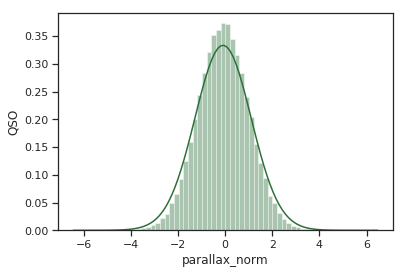

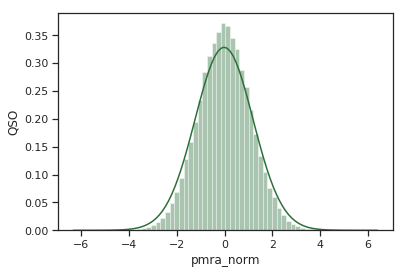

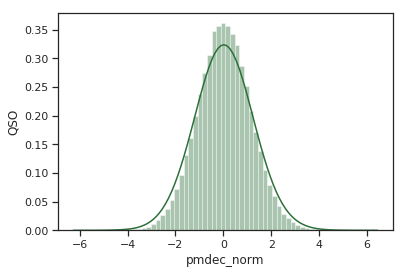

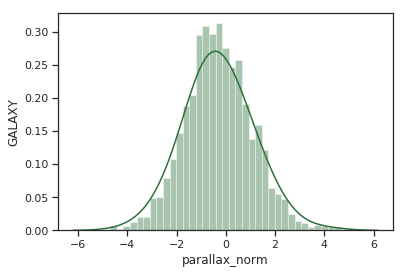

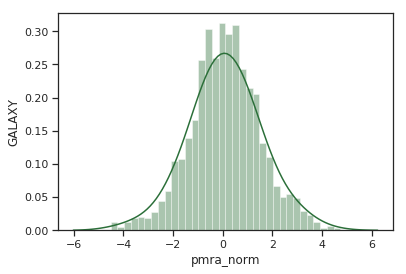

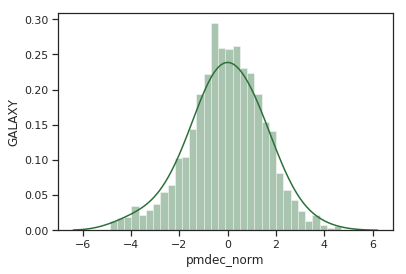

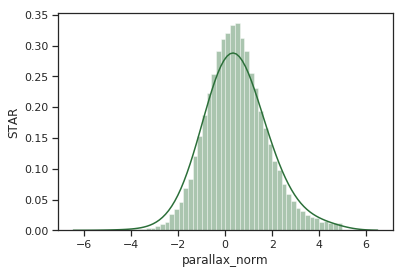

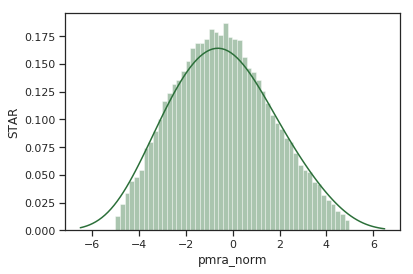

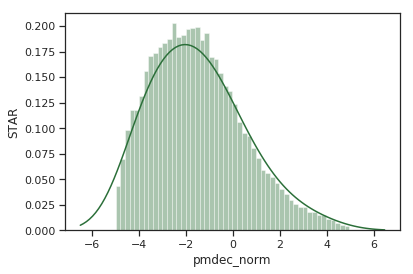

In [17]:
sdss_x_gaia_clean = process_gaia(sdss_x_gaia, error_lim=1, parallax_lim=(-5, 5), pm_lim=25)
print(describe_column(sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(sdss_x_gaia_clean, norm=True)

Data shape: (1426995, 30)
5 position shape: (992384, 30)
Removing parallax_norm shape: (955157, 30)
Removing pmra_norm and pmdec_norm shape: (506522, 30)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 21262, 288106, 197154]), array([ 4.19764591, 56.87926684, 38.92308725]))


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean:


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0600853,-0.0149936,0.0170698
GALAXY,-0.153838,0.0587702,-0.128165
STAR,0.668937,-0.613569,-2.6873


Sigma:


,parallax_norm,pmra_norm,pmdec_norm
QSO,1.0813,1.09445,1.12727
GALAXY,1.29088,1.58669,1.75655
STAR,1.85167,3.30339,3.21749


Median:


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0597641,-0.0139736,0.0173022
GALAXY,-0.165315,0.0979001,0.00192183
STAR,0.45025,-0.57806,-2.49462


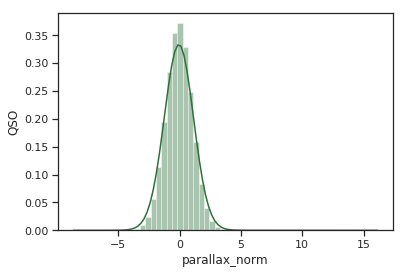

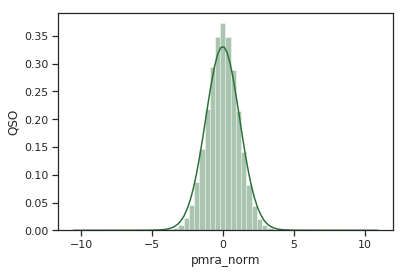

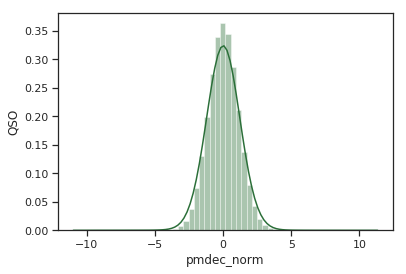

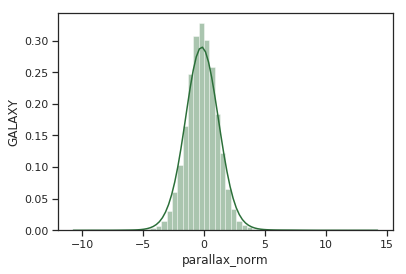

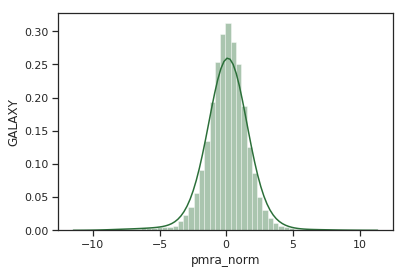

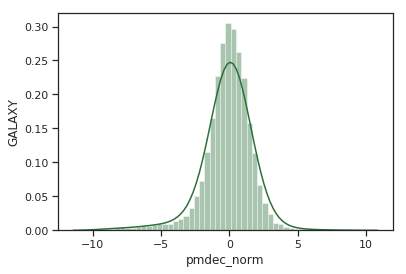

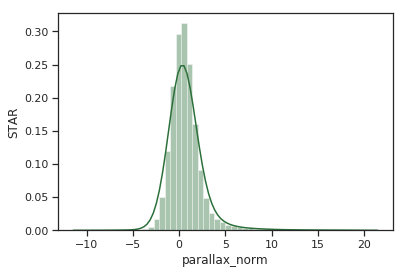

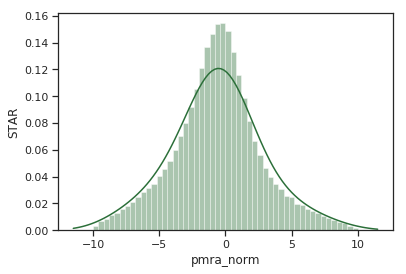

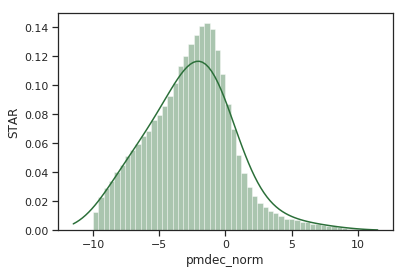

In [18]:
sdss_x_gaia_clean = process_gaia(sdss_x_gaia, error_lim=None, parallax_lim=(-10, 20), pm_lim=100)
print(describe_column(sdss_x_gaia_clean['CLASS']))
gaia_motion_analysis(sdss_x_gaia_clean, norm=True)

# KiDS x SDSS x GAIA

Data shape: (23169, 81)
5 position shape: (14407, 81)
Removing paralax_error shape: (12472, 81)
Removing pmra_error shape: (9506, 81)
Removing pmdec_error shape: (9435, 81)
Removing parallax_norm shape: (8313, 81)
Removing pmra_norm and pmdec_norm shape: (2728, 81)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 6993,  5330, 10846]), array([30.18257154, 23.00487721, 46.81255125]))
Mean:


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0296767,-0.021,0.00974639
GALAXY,0.0772357,-0.0737241,0.113597
STAR,0.280345,-1.54433,-1.37298


Sigma:


,parallax_norm,pmra_norm,pmdec_norm
QSO,1.06404,1.08939,1.09001
GALAXY,1.25899,1.36139,1.16753
STAR,1.25615,1.48822,1.86794


Median:


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0271596,-0.0124926,-0.0134658
GALAXY,0.0608144,0.0562773,0.039509
STAR,0.23444,-1.54982,-1.4061


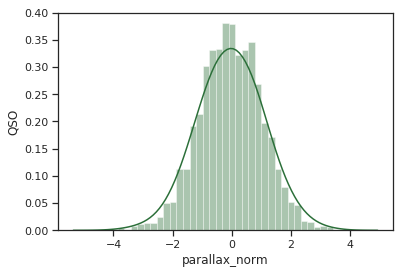

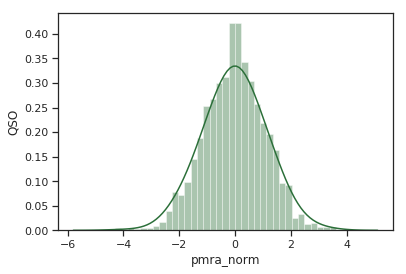

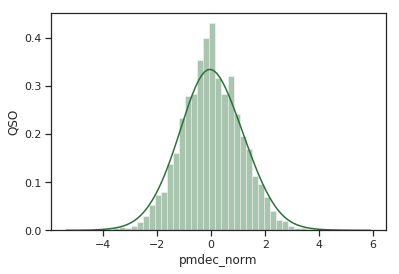

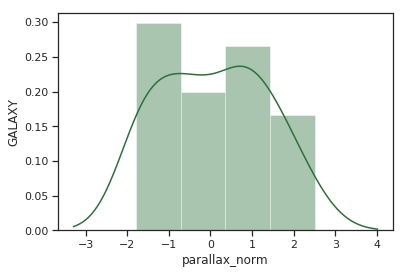

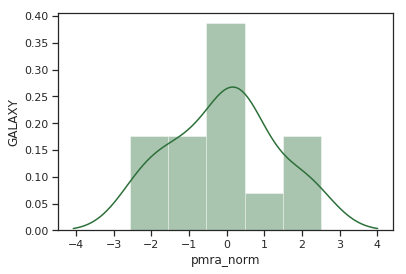

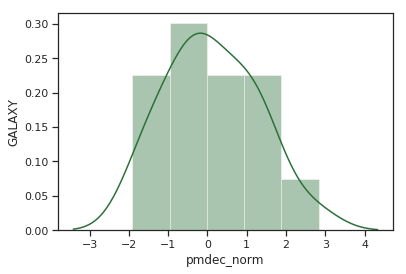

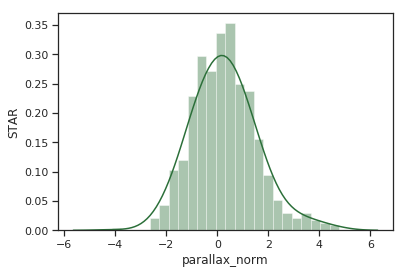

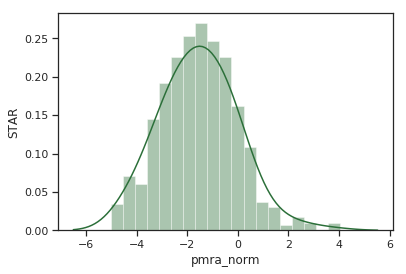

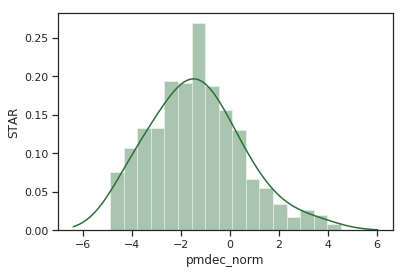

In [20]:
kids_x_sdss_x_gaia_clean = process_gaia(kids_x_sdss_x_gaia, error_lim=1, parallax_lim=(-5, 5), pm_lim=25)
print(describe_column(kids_x_sdss_x_gaia['CLASS']))
gaia_motion_analysis(kids_x_sdss_x_gaia_clean)

Data shape: (23169, 81)
5 position shape: (14407, 81)
Removing paralax_error shape: (12472, 81)
Removing pmra_error shape: (9506, 81)
Removing pmdec_error shape: (9435, 81)
Removing parallax_norm shape: (9285, 81)
Removing pmra_norm and pmdec_norm shape: (3538, 81)
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 6993,  5330, 10846]), array([30.18257154, 23.00487721, 46.81255125]))
Mean:


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0314082,-0.0220323,0.0105451
GALAXY,0.354469,-0.725471,0.0585571
STAR,0.595099,-2.64294,-2.99997


Sigma:


,parallax_norm,pmra_norm,pmdec_norm
QSO,1.06454,1.09314,1.12052
GALAXY,1.28408,2.49414,2.82312
STAR,1.64695,3.02131,3.60419


Median:


,parallax_norm,pmra_norm,pmdec_norm
QSO,-0.0290522,-0.0133435,-0.0132333
GALAXY,0.620649,-0.0933898,0.039509
STAR,0.418227,-2.43164,-2.93145


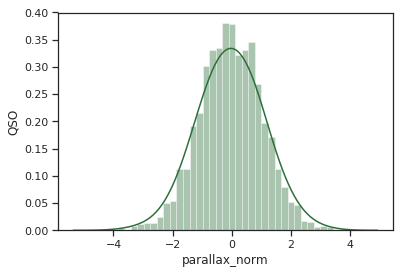

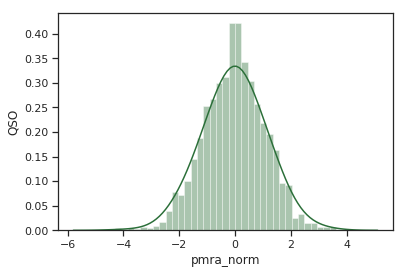

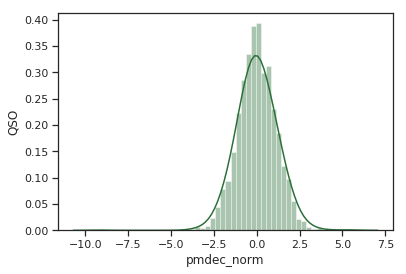

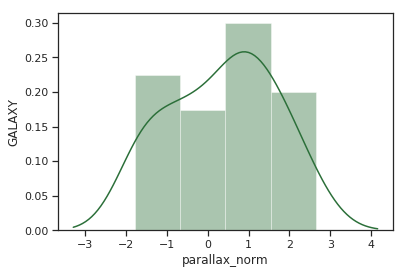

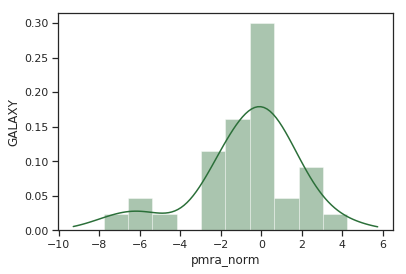

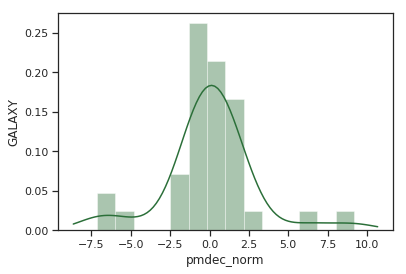

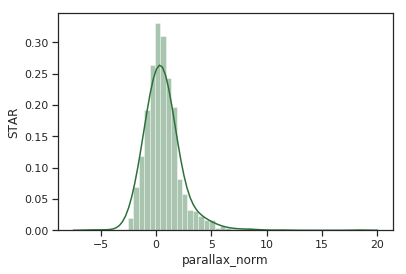

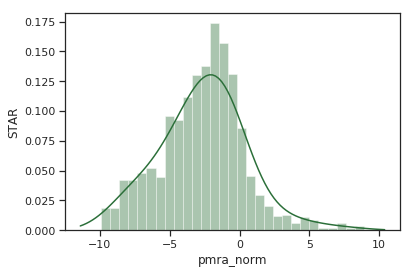

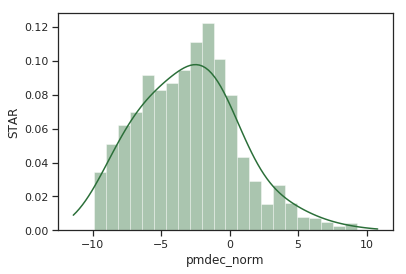

In [22]:
kids_x_sdss_x_gaia_clean = process_gaia(kids_x_sdss_x_gaia, error_lim=1, parallax_lim=(-10, 20), pm_lim=100)
print(describe_column(kids_x_sdss_x_gaia['CLASS']))
gaia_motion_analysis(kids_x_sdss_x_gaia_clean)